In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
#def ff(x):
#    max(f) for f in x.split(';')

In [2]:
rare_neutrals = pd.read_csv('/home/vpt/data/dbNSFP/dbNSFP4.0a/rare_homoz_dbNSFP4.0a.csv',sep = '\t')
df = pd.read_csv('/home/vpt/data/benchmark/Jinchen2018/jinchen_dbNSFP40a.tsv',sep = '\t')

/usr/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2741: DtypeWarning: Columns (0,7,9,80,370,373,374,375) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler)
/usr/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2741: DtypeWarning: Columns (1,8,10,81,378) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler)


In [3]:
SampleRareNeutrClinvar = rare_neutrals.sample(n=2800, random_state=1)
SampleRareNeutrClinvar['Data source'] = 'ClinVar'
SampleRareNeutrClinvar['Label'] =  'RareBenign'

SampleRareNeutrSSC = rare_neutrals.sample(n=1650, random_state=2)
SampleRareNeutrSSC['Data source'] = 'SSC'
SampleRareNeutrSSC['Label'] =  'RareBenign'

SampleRareTP53 = rare_neutrals.sample(n=600, random_state=3)
SampleRareTP53['Data source'] = 'TP53'
SampleRareTP53['Label'] =  'RareBenign'

SampleRareICGC = rare_neutrals.sample(n=60, random_state=4)
SampleRareICGC['Data source'] = 'ICGC'
SampleRareICGC['Label'] =  'RareBenign'


In [4]:
df2 = pd.concat([df[df["Data source"].isin(['ClinVar','SSC'])],SampleRareNeutrClinvar,SampleRareNeutrSSC])
df3 = pd.concat([df[df["Data source"].isin(['TP53','ICGC'])],SampleRareTP53,SampleRareICGC])

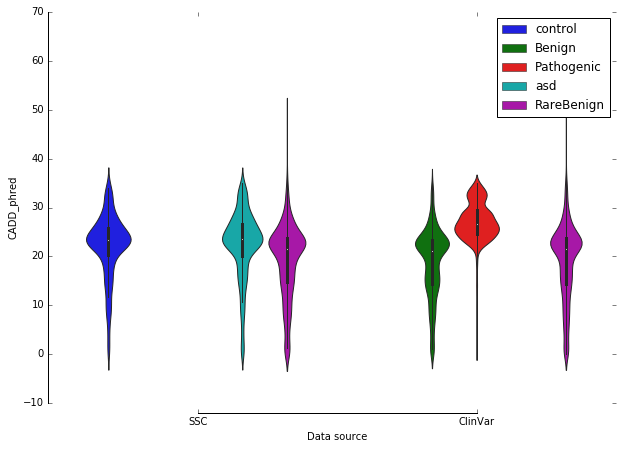

In [6]:
fig=plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
sns.violinplot(x="Data source", y="CADD_phred",
            hue="Label",
            data=df2)
plt.legend(loc='upper right')
sns.despine(offset=10, trim=True)

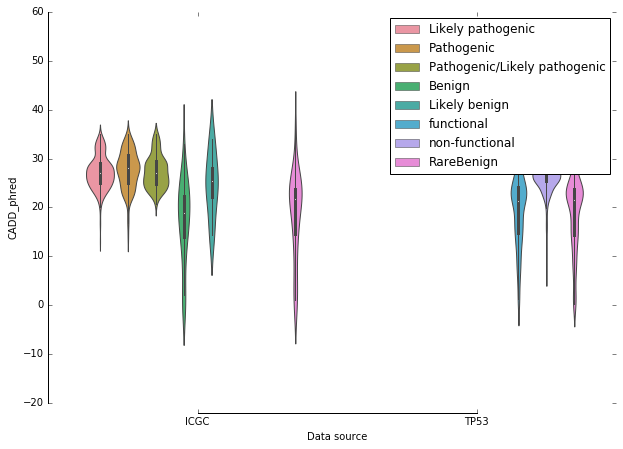

In [7]:
fig=plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')
sns.violinplot(x="Data source", y="CADD_phred",
            hue="Label",
            data=df3)
plt.legend(loc='upper right')
sns.despine(offset=10, trim=True)

In [12]:
df[df['Data source'] == 'ClinVar']

,Unnamed: 0,#chr,pos(1-based),ref,alt,aaref,aaalt,rs_dbSNP151,hg19_chr,hg19_pos(1-based),...,GTEx_V7_tissue,Geuvadis_eQTL_target_gene,Data source,Chr,Start,End,Ref,Alt,Gene_symbol,Label
1,1-10364260-A-G,1,10304202,A,G,E,G,rs148481786,1,10364260,...,NaN,NaN,ClinVar,1,10364260,10364260,A,G,KIF1B,Benign
2,1-10364335-T-C,1,10304277,T,C,I,T,rs149267056,1,10364335,...,NaN,NaN,ClinVar,1,10364335,10364335,T,C,KIF1B,Benign
3,1-10381802-T-C,1,10321744,T,C,W,R,rs551543997,1,10381802,...,NaN,NaN,ClinVar,1,10381802,10381802,T,C,KIF1B,Benign
4,1-10381887-A-G,1,10321829,A,G,N,S,rs117525287,1,10381887,...,NaN,NaN,ClinVar,1,10381887,10381887,A,G,KIF1B,Benign
5,1-10397567-A-G,1,10337509,A,G,Y,C,rs2297881,1,10397567,...,NaN,ENSG00000162441,ClinVar,1,10397567,10397567,A,G,KIF1B,Benign


# Could predictors distinguish between recessive and pathogenic variants?


In [233]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np
from scipy import stats
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from statannot import add_stat_annotation
from scipy import stats

In [4]:
dbnsfp_clinvar = pd.read_csv('/home/vpt/data/dbNSFP/dbNSFP4.0a/dbnsfp_clinvar.txt',sep = '\t')


/home/vpt/venvs/py3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0,1,7,8,9,10,53,101,102,103,104,105,106,107,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,151,152,153,154,363) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Load clinvar AD and AR

In [6]:
AR =  pd.read_csv('/home/vpt/data/clinvar/clinvar_omim_by_GEN/AR-clinvarOMIM.tsv',sep = '\t')
AD =  pd.read_csv('/home/vpt/data/clinvar/clinvar_omim_by_GEN/AD-clinvarOMIM.tsv',sep = '\t')
print('AD %s'%AD.shape[0])
print('AR %s'%AR.shape[0])
AD.columns

AD 76068
AR 69809


Index(['Name', 'Gene(s)', 'Condition(s)',
       'Clinical significance (Last reviewed)', 'Review status',
       'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome',
       'GRCh38Location', 'VariationID', 'AlleleID(s)', 'Unnamed: 11',
       'clinsig'],
      dtype='object')

## filter data to clinvar database

In [8]:
AR_clinvar_omim_dbnsfp = dbnsfp_clinvar[dbnsfp_clinvar.clinvar_id.isin(AR[u'VariationID'])]
print(AR_clinvar_omim_dbnsfp.shape)

AD_clinvar_omim_dbnsfp = dbnsfp_clinvar[dbnsfp_clinvar.clinvar_id.isin(AD[u'VariationID'])]
print(AD_clinvar_omim_dbnsfp.shape)

(35796, 376)
(38741, 376)


## concat both AR and AD with a inherintance flag
* Limit oly to pathogenic variants

In [9]:
AR_clinvar_omim_dbnsfp['inheritance'] = 'AR'
AD_clinvar_omim_dbnsfp['inheritance'] = 'AD'
adar = pd.concat([AR_clinvar_omim_dbnsfp,AD_clinvar_omim_dbnsfp])
adar_pathog = adar[adar.clinvar_clnsig.isin(['Pathogenic'])]
adar_pathog.replace('.',np.nan,inplace = True)
adar_pathog_transformed = adar_pathog.copy()
#stats.zscore(a)

/home/vpt/venvs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/vpt/venvs/py3/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/vpt/venvs/py3/lib/python3.5/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

In [197]:
def take_one_score(df,colname,predictors= None,sep = ';'):
    if predictors[colname] == "MIN":
        score = df[colname].str.split(sep,expand = True).replace('.',np.nan).apply(lambda x: pd.to_numeric(x,errors = 'coerce')).min(axis = 1)
    elif predictors[colname] == "MAX":
        score = df[colname].str.split(sep,expand = True).replace('.',np.nan).apply(lambda x: pd.to_numeric(x,errors = 'coerce')).max(axis = 1)
    elif predictors[colname] == None:
        score = df[colname]
#    elif predictors[colname] == "LRT":
#    elif predictors[colname] == "MT":
    return score

In [227]:
def process_aloft(dbnsfp):
    dominante = dbnsfp.Aloft_prob_Dominant.str.split(';',expand = True).replace('.',0).apply(lambda x: pd.to_numeric(x,errors = 'coerce'))
    recesivo = dbnsfp.Aloft_prob_Recessive .str.split(';',expand = True).replace('.',0).apply(lambda x: pd.to_numeric(x,errors = 'coerce'))
    recesivo_relativo = (recesivo/(dominante + recesivo)).max(axis = 1)
    return(recesivo_relativo.values)



In [202]:
predictors ={'MutPred_score':None,
             'PROVEAN_score':'MIN',
             'SIFT4G_score':'MIN',
             'Polyphen2_HDIV_score':'MAX',
             'Polyphen2_HVAR_score':'MAX',
             'MutationAssessor_score':'MAX',
             #'LRT':'LRT',
             #'MutationTaster':'MT',
             'FATHMM_score':'MIN',
             'VEST4_score':'MAX',
             'GERP++_RS':None,
             'SiPhy_29way_logOdds':None,
             'phyloP100way_vertebrate':None,
             'phyloP30way_mammalian':None,
             'phyloP17way_primate':None,
             'phastCons100way_vertebrate':None,
             'phastCons30way_mammalian':None,
             'phastCons17way_primate':None,
             'CADD_raw':None,
             'DANN_score':None,
             'phastCons17way_primate':None,
             'REVEL_score':None
            }



In [228]:
adar_pathog[list(predictors.keys())] = adar_pathog[predictors.keys()].replace('-',np.nan)

for col in predictors.keys():
    print (col)
    adar_pathog_transformed[col] = take_one_score(df = adar_pathog,colname = col,predictors = predictors)
adar_pathog_transformed['Aloft'] = process_aloft(adar_pathog)

/home/vpt/venvs/py3/lib/python3.5/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


MutPred_score
phyloP17way_primate
phastCons100way_vertebrate
phyloP100way_vertebrate
CADD_raw
MutationAssessor_score
GERP++_RS
Polyphen2_HDIV_score
SiPhy_29way_logOdds
phastCons17way_primate
DANN_score
phastCons30way_mammalian
Polyphen2_HVAR_score
phyloP30way_mammalian
FATHMM_score
REVEL_score
VEST4_score
SIFT4G_score
PROVEAN_score


In [229]:
methods = list(predictors.keys())+['Aloft']
adar_long = pd.melt(adar_pathog_transformed, id_vars=['inheritance'], value_vars=methods)
adar_long.value = pd.to_numeric(adar_long.value)

In [119]:
#adar_long[(adar_long.variable == method)&(adar_long.inheritance == inh)].value

Aloft


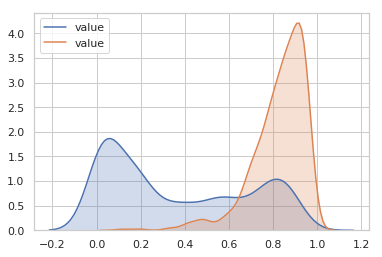

In [231]:
method = 'Aloft'
print (method)
for inh in ['AD','AR']:
    sns.kdeplot(adar_long[(adar_long.variable == method)&(adar_long.inheritance == inh)&(~adar_long.value.isnull())].value, shade=True)

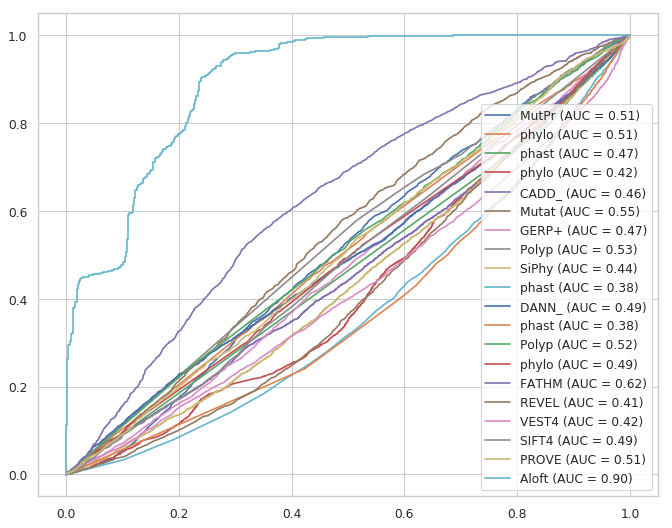

In [244]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
dfauc = pd.DataFrame(); aucs = []
for method in adar_long.variable.unique():
    d = adar_long[(adar_long.variable == method)&(~adar_long.value.isna())]
    y_score = d.value
    y_true = d.inheritance
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score, pos_label='AR')
    auc = roc_auc_score(y_true, y_score)
    aucs.append(auc)
    plt.plot(fpr,tpr,label='%s (AUC = %0.2f)' % (method[0:5], auc))

plt.legend(loc="lower right")
plt.show()
    #w, p = stats.mannwhitneyu(x = x, y = y)
#    print('method %.2f : %s'%(auc,method))
#dfauc['method'] = adar_long.variable.unique()
#dfauc['auc'] = aucs
#dfauc['sortt'] = np.abs(0.5-dfauc.auc)
#dfauc.sort_values(by = ['sortt'],ascending = False,inplace = True)
#dfauc

In [ ]:
## con mannwitney u test casi todo da signif. La 

In [80]:
for method in adar_long.variable.unique():
    d = adar_long[adar_long.variable == method]
    x = d[d.inheritance == 'AD'].value
    y = d[d.inheritance == 'AR'].value
    w, p = stats.mannwhitneyu(x = x, y = y)
    print('method %.2E : %s'%(p,method)) 
    

method 2.79E-03 : MutPred_score
method 1.10E-01 : phyloP17way_primate
method 2.78E-22 : phastCons100way_vertebrate
method 2.63E-62 : phyloP100way_vertebrate
method 1.06E-17 : CADD_raw
method 2.66E-29 : MutationAssessor_score
method 3.21E-08 : GERP++_RS
method 3.40E-29 : Polyphen2_HDIV_score
method 1.30E-37 : SiPhy_29way_logOdds
method 4.08E-161 : phastCons17way_primate
method 6.82E-02 : DANN_score
method 1.56E-158 : phastCons30way_mammalian
method 5.25E-33 : Polyphen2_HVAR_score
method 2.24E-03 : phyloP30way_mammalian
method 6.64E-02 : FATHMM_score
method 3.06E-35 : REVEL_score
method 1.92E-26 : VEST4_score
method 4.50E-16 : SIFT4G_score
method 2.22E-11 : PROVEAN_score


In [ ]:
#

In [127]:
adar_long.groupby(['variable'])[['inheritance','value']].apply(lambda d: wilcoxon(x = d[d.inheritance == 'AD'].value, y=d[d.inheritance == 'AR'].value,zero_method='wilcox', correction=False)

SyntaxError: unexpected EOF while parsing (<ipython-input-127-53326a193f0e>, line 1)

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MutPred_score v.s. CADD_raw: t-test independent samples, P_val=0.000e+00 stat=-2.185e+02


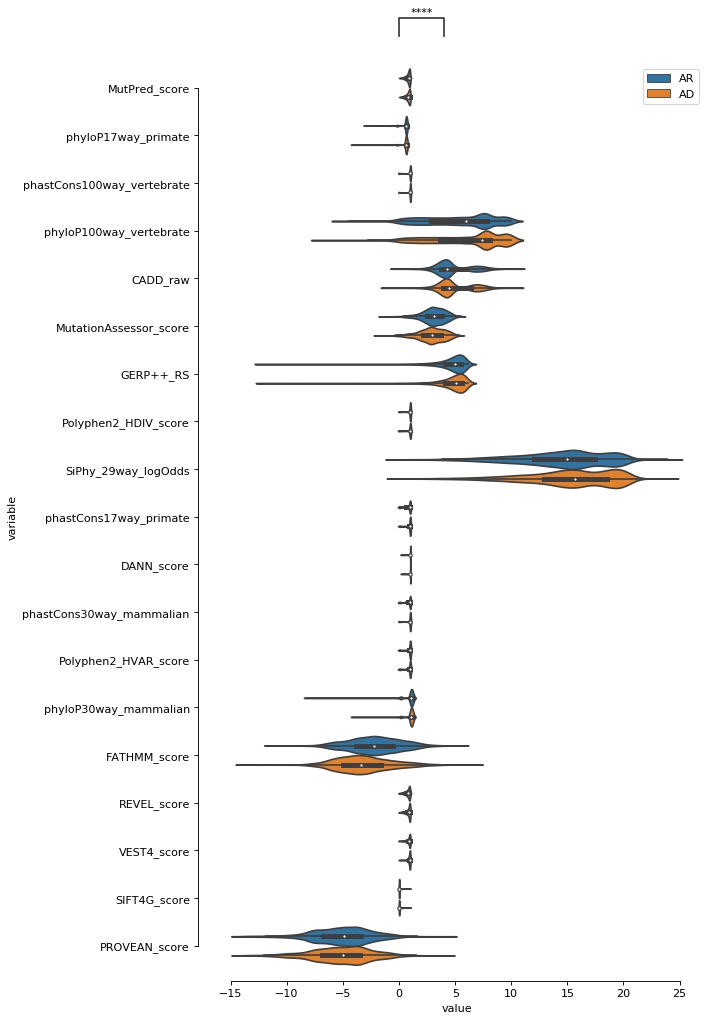

In [50]:
fig=plt.figure(figsize=(8, 15), dpi= 80, facecolor='w', edgecolor='k')
ax = sns.violinplot(y="variable", x="value",
            hue="inheritance",
            data=adar_long)


#add_stat_annotation(ax, data = adar_long, y = "variable", x = "value",
#                    boxPairList=[("MutPred_score","CADD_raw")],
#                    test = 't-test_ind', textFormat='star', loc='outside', verbose=2,order=None)

#(ax, data=adar_long, x='variable', y='value',
#                    boxPairList=[(("MutPred_score", "AD"), ("MutPred_score", "AR"))],                          
                    



plt.legend(loc='upper right')

sns.despine(offset=10, trim=True)
#plt.xticks(rotation=90)


In [317]:
def normalize(x):
    mmax = np.nanmax(x)
    mmin = np.nanmin(x)
    normed = (x - mmin)/(mmax - mmin)
    return normed

In [321]:
adar_long.head()

,inheritance,variable,value
0,AR,Polyphen2_HDIV_score,NaN
1,AR,Polyphen2_HDIV_score,NaN
2,AR,Polyphen2_HDIV_score,0.395558
3,AR,Polyphen2_HDIV_score,0.395532
4,AR,Polyphen2_HDIV_score,NaN


In [325]:
adar_long = pd.melt(adar_pathog_transformed, id_vars=['inheritance'], value_vars=predictors)
adar_long.value = pd.to_numeric(adar_long.value)
adar_long.value = adar_long.groupby('variable')['value'].apply(lambda x: normalize(x))


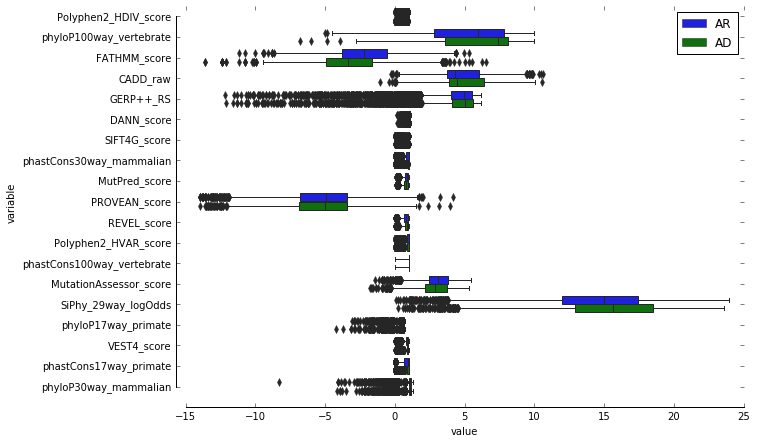

In [346]:
fig=plt.figure(figsize=(10, 7), dpi= 80, facecolor='w', edgecolor='k')


sns.boxplot(y="variable", x="value",
            hue="inheritance",
            data=adar_long)
plt.legend(loc='upper right')

sns.despine(offset=10, trim=True)

In [60]:
#stats.zscore(a)
#y_true = np.array([0, 0, 1, 1])
#y_scores = np.array([0.1, 0.4, 0.35, 0.8])
#roc_auc_score(y_true, y_scores)

#y_true = adar[['inheritance']].values
#aucs = adar_pathog[['CADD_phred','REVEL_score']].apply(lambda x: roc_auc_score(y_true, x))
#adar.C

/usr/local/lib/python2.7/dist-packages/pandas/core/reshape/reshape.py:731: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  frame = frame.loc[:, id_vars + value_vars]
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


REVEL_raw     74537
CADD_phred    74537
Name: variable, dtype: int64